In [1]:
# disable INFO messages (e.g. from tensorflow)

# 0 = all messages are logged (default behavior)
# 1 = INFO messages are not printed
# 2 = INFO and WARNING messages are not printed
# 3 = INFO, WARNING, and ERROR messages are not printed
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'
print("Current Directory: {}".format(os.getcwd()))

Current Directory: /tf/notebooks


In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
import pandas as pd
import numpy as np
import random
import cv2
from tensorflow import keras
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


In [4]:
# dataset paths

afnet_img = 'AffectNet/train_set/images'
afnet_anno = 'AffectNet/train_set/annotations'

In [5]:
# emotion categories
# classes 8-10 are not facial expressions but classes of uncertainty of annotators
classes = {
    0:'neutral',
    1:'happiness',
    2:'sadness',
    3:'surprise',
    4:'fear',
    5:'disgust',
    6:'anger',
    7:'contempt',
    8:'none',
    9:'uncertain',
    10:'no-face'
}

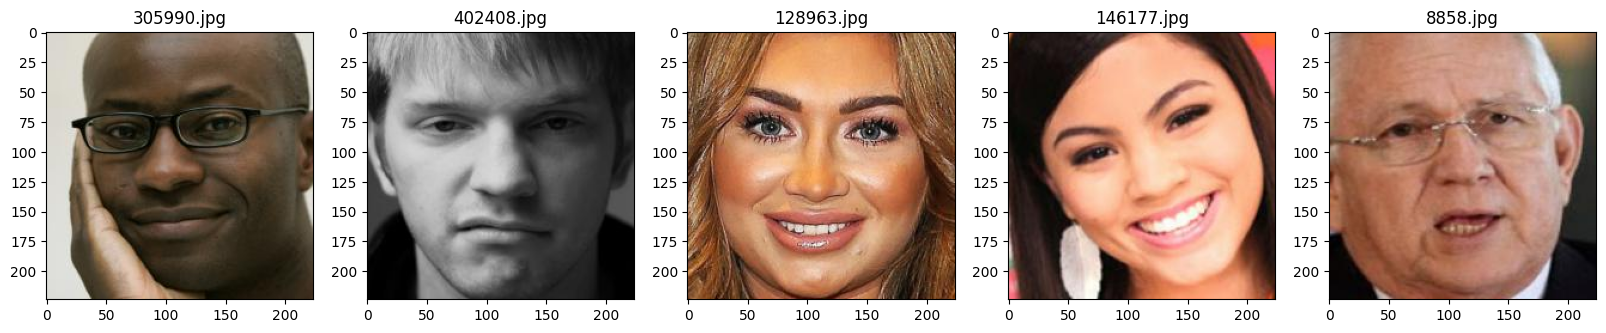

In [6]:
# select & plot random images

plt.figure(figsize=(20,20))

samples = 5
img_list = os.listdir(afnet_img) # list of all images in folder
img_list.sort(key=lambda x: int(os.path.splitext(x)[0]))  # Extract numeric prefix without file extension
img_files = [random.choice(img_list) for i in range(samples)] # random samples
img_indices = [img_list.index(img) for img in img_files] # indices 

for img_file in img_files:
    img_path = os.path.join(afnet_img, img_file)
    img = mpimg.imread(img_path)
    ax = plt.subplot(1,samples,img_files.index(img_file)+1)
    ax.title.set_text(img_file)
    plt.imshow(img)

In [7]:
print('Image indices:\t', img_indices) # print indices
print('Image files:\t', [img_list[index] for index in img_indices]) # test if indices correspond to images shown above

Image indices:	 [211847, 278981, 89266, 101137, 6201]
Image files:	 ['305990.jpg', '402408.jpg', '128963.jpg', '146177.jpg', '8858.jpg']


In [8]:
# load file list of annotations
anno_list = os.listdir(afnet_anno)
# sort list by file name (ascending)
anno_list.sort(key=lambda x: int(x.split('_')[0])) # Assumes the numeric prefix is followed by an underscore
# collect corresponding file names of annotations
anno_files = [[anno_list[img_indices[i]*4+j] for j in range(0,4)] for i in range(0,len(img_indices))]
anno_files

[['305990_aro.npy', '305990_exp.npy', '305990_lnd.npy', '305990_val.npy'],
 ['402408_aro.npy', '402408_exp.npy', '402408_lnd.npy', '402408_val.npy'],
 ['128963_aro.npy', '128963_exp.npy', '128963_lnd.npy', '128963_val.npy'],
 ['146177_aro.npy', '146177_exp.npy', '146177_lnd.npy', '146177_val.npy'],
 ['8858_aro.npy', '8858_exp.npy', '8858_lnd.npy', '8858_val.npy']]

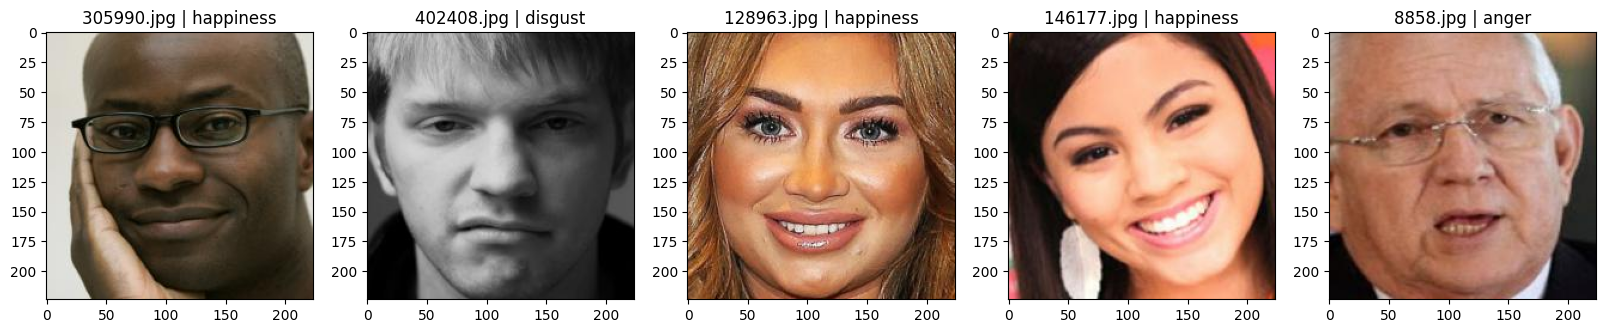

In [9]:
# Plot images again with corresponding classes
plt.figure(figsize=(20,20))
for img_file in img_files:
    img_path = os.path.join(afnet_img, img_file)
    img = mpimg.imread(img_path)
    
    anno_file_path = os.path.join(afnet_anno, anno_files[img_files.index(img_file)][1]) # index 1 is _exp.npy
    exp_class = int(np.load(anno_file_path))
    expression = classes[exp_class]
    
    ax = plt.subplot(1,samples,img_files.index(img_file)+1)
    ax.title.set_text('{} | {}'.format(img_file, expression))
    plt.imshow(img)

In [10]:
# show annotation infos
for img_file in img_files:
    for i in range(4):
        file = anno_files[img_files.index(img_file)][i]
        anno_file_path = os.path.join(afnet_anno, file)
        data = np.load(anno_file_path)
        print('Info from {}:\n'.format(file), data)
        print()

Info from 305990_aro.npy:
 -0.134921

Info from 305990_exp.npy:
 1

Info from 305990_lnd.npy:
 [ 41.52804388  92.28390868  39.06486289 112.26389041  40.27700183
 131.86542466  45.52073126 151.08646575  52.47619744 170.54275799
  62.95137112 189.00690411  76.28899452 205.79565297  94.01243144
 218.77947032 116.00497258 223.01194521 141.85096892 219.85344292
 166.86157221 208.49592694 189.33528336 192.36588128 208.4285192
 174.55225571 218.81974406 150.47481279 222.99056673 126.03528767
 220.65228519 102.43857534 216.76402194  78.74367123  41.91093236
  70.49351598  47.86720293  60.61910502  58.72321755  57.44014612
  71.74347349  58.66140639  84.48936015  62.34973516 113.29199269
  58.80051142 129.28526508  50.52171689 146.96365631  46.09081279
 165.09250457  49.44365297 179.10171846  58.64299543  99.58171846
  79.4903379   98.99612431  92.85873973  98.00102377 105.84051142
  97.09191956 119.65691324  83.31817185 134.72526027  92.03246801
 137.47053881 102.19641682 139.34231963 113.3022